# SENTIMENT ANALYSIS
## AMANDA MDLULI 
What happens in Sentiment Analysis?
CFGs can define patterns of sentiment expressions in natural language, aiding in the identification of sentiment in texts. NLP techniques are then applied to analyze the sentiment expressed in the text, while NLG can be used to generate summaries or reports of sentiment analysis results.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import random

# Download NLTK resources 
nltk.download('vader_lexicon')
nltk.download('punkt')

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
imdb_data=pd.read_csv("C:/Users/Admin/Downloads/IMDB Dataset.csv/IMDB Dataset.csv")
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<AxesSubplot:>

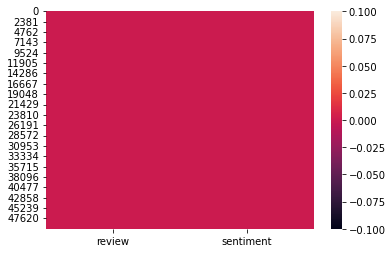

In [4]:
sns.heatmap(imdb_data.isnull())

In [5]:
#Summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
#sentiment count
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [7]:
# Initialize Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()


In [8]:
# Perform sentiment analysis and add sentiment scores to the dataframe
imdb_data['sentiment_score'] = imdb_data['review'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [9]:
# Function to generate summaries
def generate_summary(data):
    overall_sentiment = 'Neutral'
    overall_score = data['sentiment_score'].mean()
    if overall_score > 0.05:
        overall_sentiment = 'Positive'
    elif overall_score < -0.05:
        overall_sentiment = 'Negative'
    
    summary = f"The overall sentiment of the dataset is {overall_sentiment}."
    return summary

In [10]:
# Function to generate word cloud
def generate_wordcloud(data, sentiment):
    text = ' '.join(data[data['sentiment'] == sentiment]['review'].tolist())
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = nltk.corpus.stopwords.words('english'), 
                min_font_size = 10).generate(text)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.show()

In [11]:
# Generate summaries
overall_summary = generate_summary(imdb_data)
print("Overall Summary:")
print(overall_summary)

Overall Summary:
The overall sentiment of the dataset is Positive.


In [12]:
# Generate word clouds for each sentiment
generate_wordcloud(imdb_data, 'positive')
generate_wordcloud(imdb_data, 'negative')

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Admin/nltk_data'
    - 'C:\\Users\\Admin\\anaconda3\\nltk_data'
    - 'C:\\Users\\Admin\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Admin\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
# Visualize sentiment distribution
plt.hist(imdb_data['sentiment_score'], bins=20, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Convert 'sentiment' column to binary (1 for positive, 0 for negative)
imdb_data['sentiment'] = imdb_data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
imdb_data.head()


In [ ]:
imdb_data.info()

In [ ]:
#split the dataset  
#train dataset
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]
#test dataset
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

In [ ]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
import string
string.punctuation

In [ ]:
imdb_data['review'] = imdb_data['review'].apply(lambda x: [a for a in x if a not in string.punctuation])

In [ ]:
imdb_data = pd.DataFrame(data=imdb_data,columns=['review','sentiment'])

In [ ]:
imdb_data['review']=imdb_data['review'].apply(''.join)

In [ ]:
imdb_data

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)


In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

In [ ]:
#Filtering
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]

    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

In [ ]:
#normalized train reviews
norm_train_reviews=imdb_data.review[:40000]
norm_train_reviews[0]


In [ ]:
#Normalized test reviews
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[45005]


In [ ]:
imdb_data.head()

In [ ]:
#Bag of Words model
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

In [ ]:
#Tfidf model
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

In [ ]:
#labeling the sentiment data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

In [ ]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)


In [ ]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

In [ ]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

In [ ]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

In [ ]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text


# Example new text data
new_text = "This hate this movie."


cleaned_text = preprocess_text(new_text)

# Vectorize the cleaned text using the same vectorizer used during training
vectorized_text = cv.transform([cleaned_text])

# Make predictions using the trained model
prediction = lr.predict(vectorized_text)
# Interpret the prediction
if prediction == 1:
    print("The sentiment of the new text is Positive.")
else:
    print("The sentiment of the new text is Negative.")

In [ ]:
# Example new text data
new_text = "This love this movie."


cleaned_text = preprocess_text(new_text)

# Vectorize the cleaned text using the same vectorizer used during training
vectorized_text = cv.transform([cleaned_text])

# Make predictions using the trained model
prediction = lr_bow.predict(vectorized_text)
# Interpret the prediction
if prediction == 1:
    print("The sentiment of the new text is Positive.")
else:
    print("The sentiment of the new text is Negative.")

In [ ]:
# Example new text data
new_text = "This hate this movie."


cleaned_text = preprocess_text(new_text)

# Vectorize the cleaned text using the same vectorizer used during training
vectorized_text = cv.transform([cleaned_text])

# Make predictions using the trained model
prediction = lr_tfidf.predict(vectorized_text)
# Interpret the prediction
if prediction == 1:
    print("The sentiment of the new text is Positive.")
else:
    print("The sentiment of the new text is Negative.")

In [ ]:
X=imdb_data['review']
y=imdb_data['sentiment']

In [ ]:
cv = CountVectorizer()

In [ ]:
X= cv.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
nb.fit(X_train,y_train)

In [ ]:
pred = nb.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))

In [ ]:
pred

In [ ]:
# Example new text data
new_text = "This is the best movie ever!"

# Preprocess the new text
cleaned_text = preprocess_text(new_text)

# Vectorize the cleaned text using the same vectorizer used during training
vectorized_text = cv.transform([cleaned_text])

# Make predictions using the trained model
prediction = nb.predict(vectorized_text)
# Interpret the prediction
if prediction == 1:
    print("The sentiment of the new text is Positive.")
else:
    print("The sentiment of the new text is Negative.")

In [ ]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
X=imdb_data['review']
y=imdb_data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [ ]:
pipeline.fit(X_train,y_train)

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
# Use the pipeline model to predict the sentiment of the preprocessed text
new_text = "AWFUL!"
cleaned_text = preprocess_text(new_text)
prediction = pipeline.predict([cleaned_text])

# Interpret the prediction
if prediction == 1:
    print("The sentiment of the new text is Positive.")
else:
    print("The sentiment of the new text is Negative.")


In [ ]:
@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        new_text = request.form['text']
        cleaned_text = preprocess_text(new_text)
        prediction = pipeline.predict([cleaned_text])
        if prediction == 1:
            sentiment = "Positive"
        else:
            sentiment = "Negative"
        return render_template('result.html', sentiment=sentiment)

if __name__ == '__main__':
    app.run(debug=True)

In conclusion ,the Pipeline model performs better than the Logistic Regression and Multinomial Naive Bayes models.